# Test with RLLib

In [1]:
# autoreload code changes
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from tqdm import tqdm

In [4]:
from banana_env import BananaEnv

In [5]:
import ray
from ray.rllib.agents import dqn

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
ray.init(include_dashboard=False)

{'node_ip_address': '192.168.0.23',
 'raylet_ip_address': '192.168.0.23',
 'redis_address': '192.168.0.23:6379',
 'object_store_address': 'tcp://127.0.0.1:64017',
 'raylet_socket_name': 'tcp://127.0.0.1:64531',
 'webui_url': None,
 'session_dir': 'C:\\Users\\joewo\\AppData\\Local\\Temp\\ray\\session_2021-05-28_17-13-26_576609_15196',
 'metrics_export_port': 64612,
 'node_id': '64ecaa2477c5bd374c392c642072cced76cca980733ead48168214fe'}

In [7]:
exe = "../../deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe"

In [8]:
config = dqn.DEFAULT_CONFIG
config["framework"] = "torch"
config["env_config"] = {"executable": exe, "train_mode": True}
trainer = dqn.DQNTrainer(env=BananaEnv, config=config)

2021-05-28 17:14:28,266	INFO trainer.py:694 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
2021-05-28 17:14:33,274	WARNING util.py:53 -- Install gputil for GPU system monitoring.


In [13]:
mean_rewards = []
mean_lens = []
for i in tqdm(range(1000)):
    # Perform one iteration of training the policy with DQN
    result = trainer.train()
    mean_rewards.append(result['episode_reward_mean'])
    mean_lens.append(result['episode_len_mean'])

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [4:07:11<00:00, 14.83s/it]


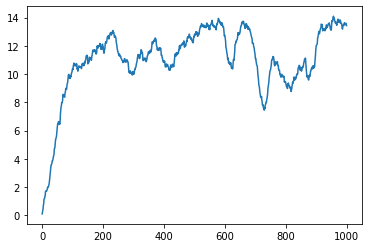

In [14]:
plt.plot(mean_rewards)
plt.show()

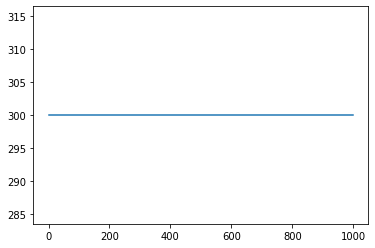

In [15]:
plt.plot(mean_lens)
plt.show()